# CBS Week 6 Tutorial: Connectionism

In [10]:

library(neuralnet)
library(testthat)
options(warn=-1)

# Artifical Neural Networks

ANNs use simple processing units. Each unit sums its weighted inputs (including the threshold, T):  

$net = \sum_{i} x_i w_i- T$

and then applies an activation function to determine its output:

$f(net)= 
  \begin{cases}
    1,    & \text{if } net \gt 0\\
    0,    & \text{otherwise}
  \end{cases}$

$output = f(net)$

In this case, we have applied a simple threshold activation function but there are many different kinds of functions that have been used. We will introduce another one, called the logistic function, later when we discuss traning networks.

While the processing happening at any unit is quite simple, complex behaviours can emerge when these units are connected into networks.

In this tutorial, we will start by writing code to implement the artifical neural networks (ANNs) that we discussed in class. 

## Exercise 1

Below is the network that we saw in class that implements a logical OR function. The output is 1 if either of the input units are 1. 

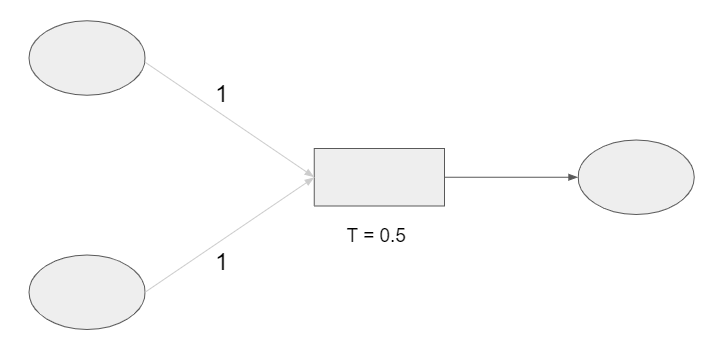

The code below implements this network. Try running the code with the inputs (x1 and x2) set to all four possibilities. That is:

* x1 = 0, x2 = 0
* x1 = 0, x2 = 1
* x1 = 1, x2 = 0
* x1 = 1, x2 = 1


In [11]:
x1 = 0
x2 = 0
w1 = 1
w2 = 1
T = 0.5
net = x1 * w1 + x2 * w2 - T
ifelse (net > 0, 1, 0)
    

[1] 0

Do the outputs come out as you expect?

Notice the way the ifelse function is used to calculate the output. The function takes three parameters. The first one is an expression that can be either true or false (a boolean expression). The second parameter is the value to return if the expression is true and the third parameter is the value to return if the expression is false.

Now lets put the code to implement the neural network into a function, so we can use it in other cells:

In [12]:
ournet = function(x1, x2){
    net = x1 * w1 + x2 * w2 - T
    ifelse(net > 0, 1, 0)
}

It is laborious to change each of the inputs by hand, so lets collect these into a dataframe and 
define a function, test, that uses a for loop to cycle through them all:

In [13]:
xs = data.frame("x1"=c(0,0,1,1), "x2"=c(0, 1, 0, 1))

test = function(xs){
    outputs = c()
    for (i in 1:4){
        output = ournet(xs$x1[i], xs$x2[i])
        outputs = c(outputs, output)
    }
    data.frame("x1"=xs$x1, "x2"=xs$x2, "output"=outputs)
}

test(xs)

x1,x2,output
<dbl>,<dbl>,<dbl>
0,0,0
0,1,1
1,0,1
1,1,1


## Exercise 2

Change the weights and/or the threshold to alter the function the unit is computing to a logical AND. 

| x1 | x2 | output |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

Run test(xs) again to see if it works.

In [14]:
### BEGIN HIDDEN SOLUTION
T = 1.5
### END HIDDEN SOLUTION

In [15]:
result = test(xs)
expect_equal(result$output[1], 0)
expect_equal(result$output[2], 0)
expect_equal(result$output[3], 0)
expect_equal(result$output[4], 1)

## Exercise 3

Now rewrite the ournet function to implement the XOR function:

| x1 | x2 | output |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

Remember that the XOR function requires a two layer network as we demonstrated in the lecture. Again, check that it is doing what it should by running test(xs). 


In [7]:
### BEGIN HIDDEN SOLUTION
w11 = 1
w21 = 1
w12 = 1
w22 = 1
wh1 = 1
wh2 = -1
Th1 = 0.5
Th2 = 1.5
T = 0.5
ournet = function(x1, x2){
    h1 = ifelse(x1 * w11 + x2 * w21 - Th1 > 0, 1, 0)
    h2 = ifelse(x1 * w12 + x2 * w22 - Th2 > 0, 1, 0)
    ifelse(h1 * wh1 + h2 * wh2 -T > 0, 1, 0)
}
test(xs)
### END HIDDEN SOLUTION

x1,x2,output
<dbl>,<dbl>,<dbl>
0,0,0
0,1,1
1,0,1
1,1,0


In [8]:
result = test(xs)
expect_equal(result$output[1], 0)
expect_equal(result$output[2], 1)
expect_equal(result$output[3], 1)
expect_equal(result$output[4], 0)

# Learning in Artifical Neural Networks


The neural networks that are used to solve real world problems sometimes have billions of weights and operate on terrabytes of data. Searching for weights by hand is infeasible - hence the need for learning algorithms like backpropagation. In the remaining exercises, we will use the neuralnet package to train networks. 

We will start by training the simple networks we have already been investigating and then will consider a more complicated example in which we will train a network to recognise digits.

To train a network, we first need to set up a dataframe with both the inputs and the desired outputs. Below df contains the input patterns and the teacher for the AND function. 

In [12]:
df = data.frame("x1"=c(0,0,1,1), "x2"=c(0, 1, 0, 1), "teach"=c(0, 0, 0, 1))
df

x1,x2,teach
<dbl>,<dbl>,<dbl>
0,0,0
0,1,0
1,0,0
1,1,1


Next we construct and train the ANN using the function neuralnet. 

__nn = neuralnet(teach~x1+x2, data=df, hidden=0, act.fct="logistic", linear.output=FALSE)__

Lets consider each of the parameters in turn:

__teach~x1+x2__ is a formula indicating that the neural network should try to predict the values in the column __teach__ using the values in __x1__ and __x2__.

__data=df__ indicates that the inputs and the teacher values are in the dataframe called df

__hidden=0__ specifies how many hidden units to use. To begin with, we will train a single layer netowrk, so there will be no hidden units.

__act.fct = "logistic"__ indicates that the network should use the logistic function rather than a threshold function as we have done previously (see below). 

__linear.output=FALSE__ indicates that we want to use the activation function we just specified when calculating outputs.

The backpropagation algorithm works by defining an error function which is small when the network is producing outputs that are close to the teacher values. The most common error function is the sum of squared errors:

$error = \sum_{p} \sum_{j} (teach_{pj} - output_{pj})^2$

where $teach_{pj}$ is the jth teacher value in the pth pattern and $output_{pj}$ is the jth output value that the network currently produces for the pth pattern. Note that this function is smallest when the $t_{pj} = output_{pj}$ for all p and j.

To train the network, we calculate the gradient of the error function with respect to each weight. By adjusting each weight in the opposite direction to the gradient, we can make the error smaller. We do this over and over until the error no longer decreases - that is we have made the outputs of the network as close to the required outputs as we can. 

The problem with using the threshold function is that the gradient is not defined at 0 and so the gradient of the weights with respect to the error signal cannot be calculated. Therefore, we use the logistic function, which is a smooth version of the threshold:

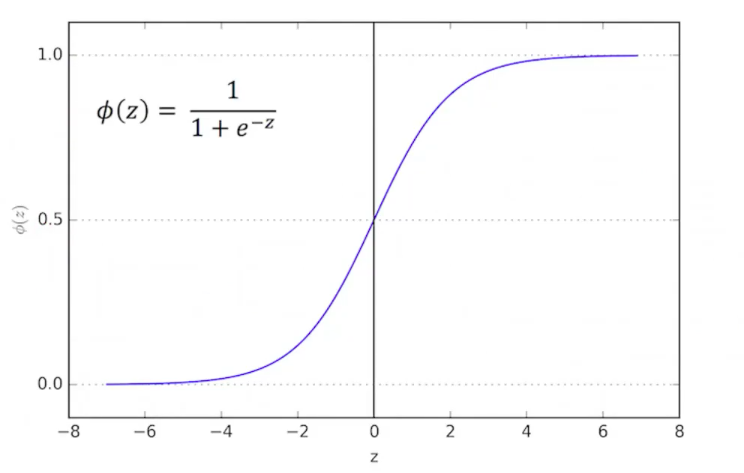

Go ahead and train the network.

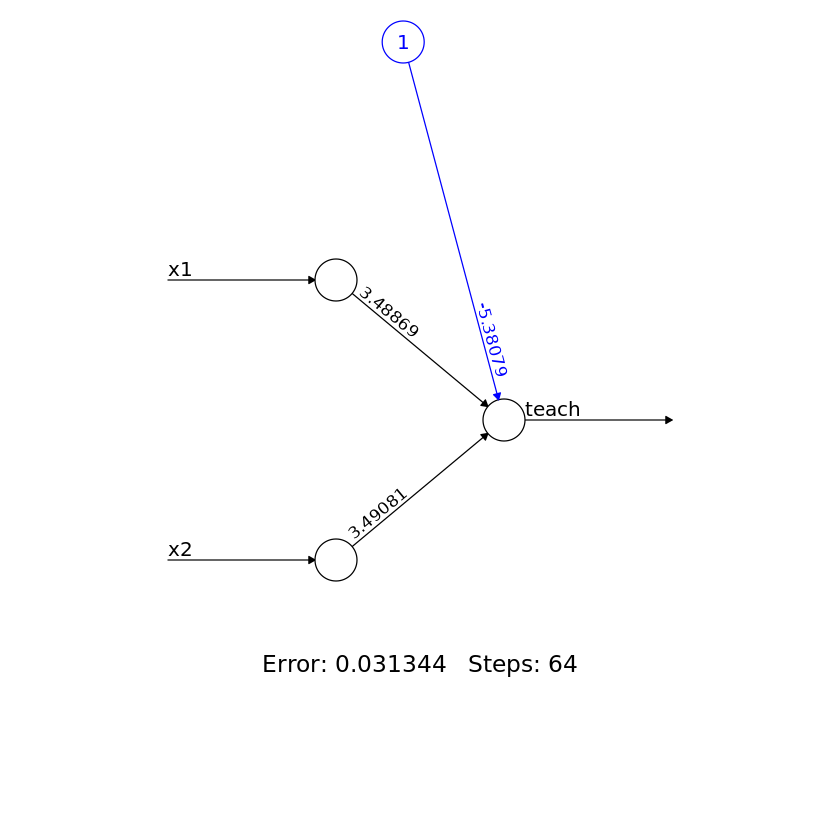

In [13]:
set.seed(6)
nn = neuralnet(teach~x1+x2, data=df, hidden=0, act.fct="logistic", linear.output=FALSE)
plot(nn, rep="best")

Rather than use a threshold as we have done before, the neuralnet package defines a new unit which is always on (see the blue unit and weight). In this way, the algorithm can avoid dealing with the threshold as a special case. It is just another weight to be updated. Note that because theunit is assumed to have a value of one the weight will typically be the negative of the threshold as we defined it previously.

The Error shown at the bottom of the plot of the network is close to 0, so the network is doing a good job of matching the teacher values. In this case, the training algorithm took 64 iteration until the error stopped changing. 

Neural networks are typically initialized with random weights. That means that you can get different solutions each time you run the netowrk. With simple networks like these, sometimes those solutions won't solve the problem at all! The network is said to have fallen into a local minimum. As the backpropagation algorithm only ever goes down, it never recovers from this situation. Fortunately, when you have networks with many hidden units the problem rarely occurs. In the code above, we have set the random number seed to 6 - so the weights will be initialized to the same values ever time and you will get the same final solution. However, it you remove this line and run the network multiple times, you will see that sometimes it does not manage to make the error small.

Now we test the network by supplying the input patterns and seeing what values it produces using the predict function.

In [14]:
test = data.frame("x1"=c(0,0,1,1), "x2"=c(0,1,0,1))
pred = predict(nn, test)
round(pred, 2)

0.00
0.13
0.13
0.83


You can see the output values are not perfectly equal to the teacher values, but they are close.

## Exercise 4

Lets convince ourselves that there really is no two layer network that can do the XOR problem. Create a dataframe for the XOR problem and then try training a neural network that has no hidden units to do it. Use the seed 6 and leave the results in the variable pred, so we can automatically test if you have produced the right solution.

0.51
0.50
0.50
0.49


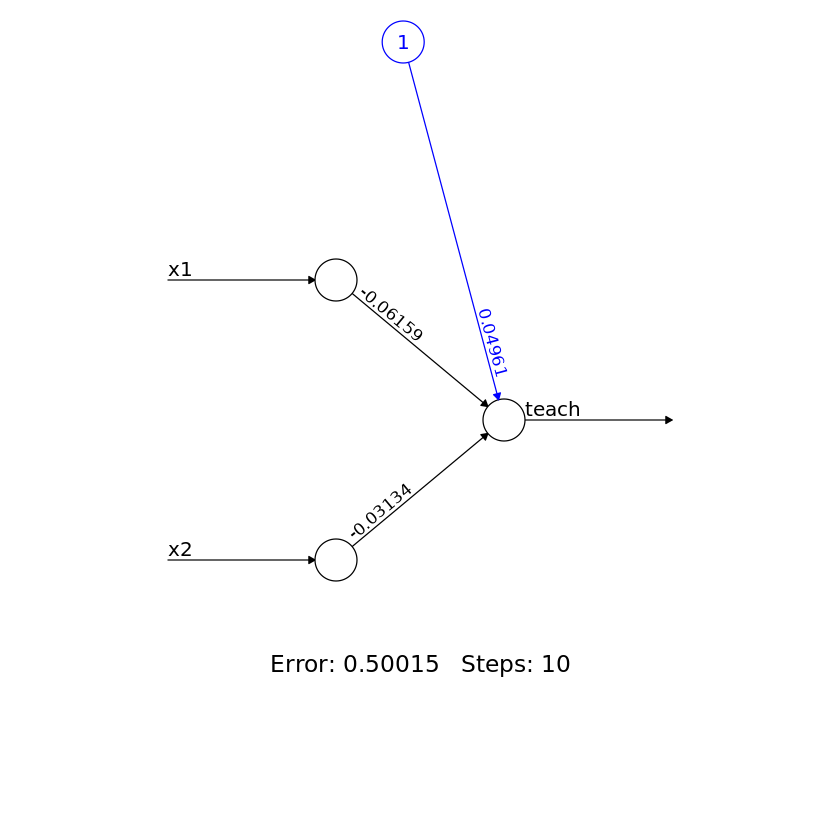

In [109]:
### BEGIN HIDDEN SOLUTION
set.seed(6)
df = data.frame("x1"=c(0,0,1,1), "x2"=c(0, 1, 0, 1), "teach"=c(0, 1, 1, 0))
nn = neuralnet(teach~x1+x2, data=df, hidden=0, act.fct="logistic", linear.output=FALSE)
plot(nn, rep="best")
test = data.frame("x1"=c(0,0,1,1), "x2"=c(0,1,0,1))
pred = predict(nn, test)
round(pred, 2)
### END HIDDEN SOLUTION

In [110]:
expect_equal(pred[1], 0.51, tolerance=0.01)
expect_equal(pred[2], 0.50, tolerance=0.01)
expect_equal(pred[3], 0.50, tolerance=0.01)
expect_equal(pred[4], 0.49, tolerance=0.01)

## Exercise 5

Now add three hidden units and see how it goes. (Hint: Using a seed of 5 will be helpful).

0.04
0.85
0.92
0.12


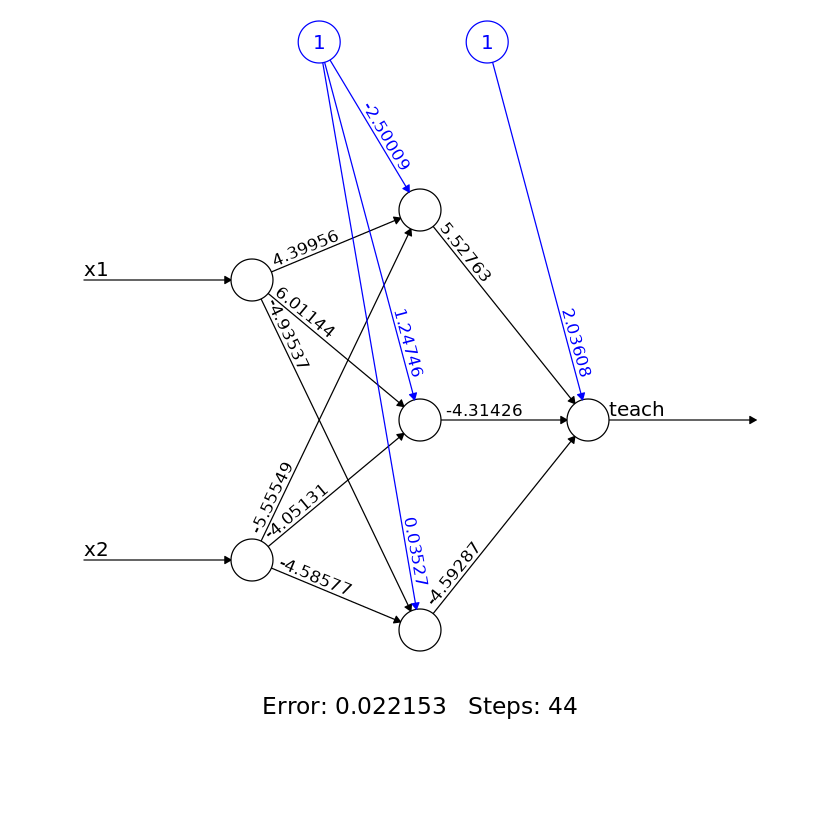

In [111]:
### BEGIN HIDDEN SOLUTION
set.seed(5)
df = data.frame("x1"=c(0,0,1,1), "x2"=c(0, 1, 0, 1), "teach"=c(0, 1, 1, 0))
nn = neuralnet(teach~x1+x2, data=df, hidden=3, act.fct="logistic", linear.output=FALSE)
plot(nn, rep="best")
test = data.frame("x1"=c(0,0,1,1), "x2"=c(0,1,0,1))
pred = predict(nn, test)
round(pred, 2)
### END HIDDEN SOLUTION

In [112]:
expect_equal(pred[1], 0.04, tolerance=0.01)
expect_equal(pred[2], 0.85, tolerance=0.01)
expect_equal(pred[3], 0.92, tolerance=0.01)
expect_equal(pred[4], 0.12, tolerance=0.01)

In this tutorial, you saw how to convert the netowrks that we discussed into code and how to use the neuralnet package in R to train your own networks. In the connectionism assignment you will get to train a larger network that recognitizes digits using the same package.  